In [245]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Data Normalization

zero mean and unit variance.

In [295]:
def normalization(data):
    mean = data.mean()
    data = data - mean
    std_dev = data.std()
    data = data / std_dev
    return data

In [246]:
data_grade = pd.read_csv("1D_grades.csv", header=None)
data_grade.columns = ['Grade']

In [ ]:
data_grade = normalization(data_grade)

## plot data

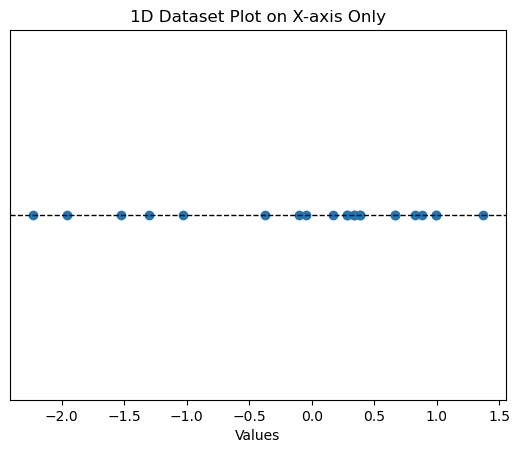

In [248]:
plt.scatter(data_grade, [0] * len(data_grade), marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Values')
plt.title('1D Dataset Plot on X-axis Only')
plt.yticks([])
plt.show()

# dataset 2

In [249]:
data_synthetic = pd.read_csv("2D_synthetic_gaussians.csv", header=None)
data_synthetic.columns = ['Feature1', 'Feature2']

In [250]:
data_synthetic = normalization(data_synthetic)

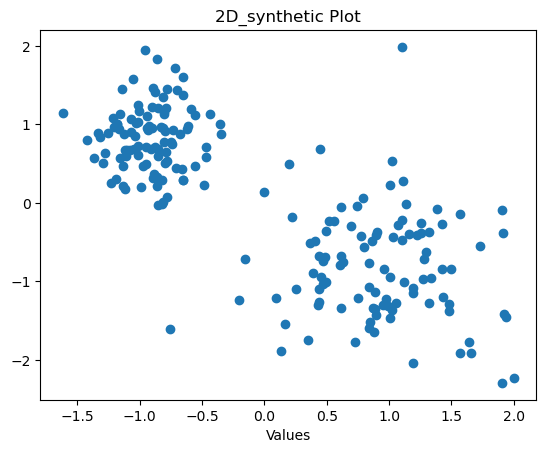

In [251]:
plt.scatter(data_synthetic['Feature1'], data_synthetic['Feature2'] , marker='o')
plt.xlabel('Values')
plt.title('2D_synthetic Plot')
plt.show()

In [252]:
dataset1, dataset2 = data_grade, data_synthetic

# Histogram

In [253]:
def histogram_density_estimation(data, bandwidth=0.1, pdf=True):
    bin_edges = np.arange(data.min(), data.max() + bandwidth, bandwidth)
    counts = np.zeros(len(bin_edges) - 1, dtype=int)
    for value in data:
        bin_index = int((value - data.min()) / bandwidth)
        counts[bin_index] += 1
    if pdf:
        normalized_counts = counts / np.sum(counts * bandwidth)
        return normalized_counts, bin_edges
    return counts, bin_edges

In [ ]:
def plot_histogram(data, bandwidths, pdf=False):
    fig, axs = plt.subplots(1, len(bandwidths), figsize=(15, 5))

    for i, bandwidth in enumerate(bandwidths):
        counts, bin_edges = histogram_density_estimation(data, bandwidth=bandwidth, pdf=pdf)
        ylabel = 'Probability Density' if pdf else 'Frequency'
        
        axs[i].bar(bin_edges[:-1], counts, width=bandwidth, label=f'bandwidth={bandwidth}', edgecolor='black', align='edge')
        axs[i].set_title(f'PDF with Bandwidth={bandwidth}')
        axs[i].set_xlabel('Grade')
        axs[i].set_ylabel(ylabel)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

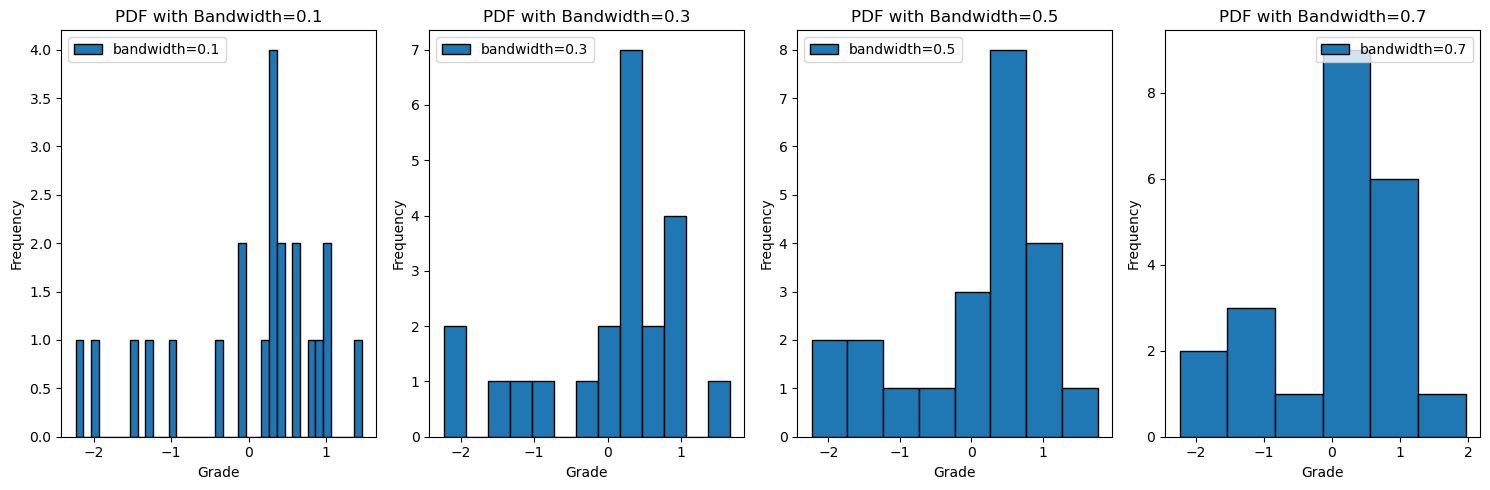

-----------------------------------------------------------


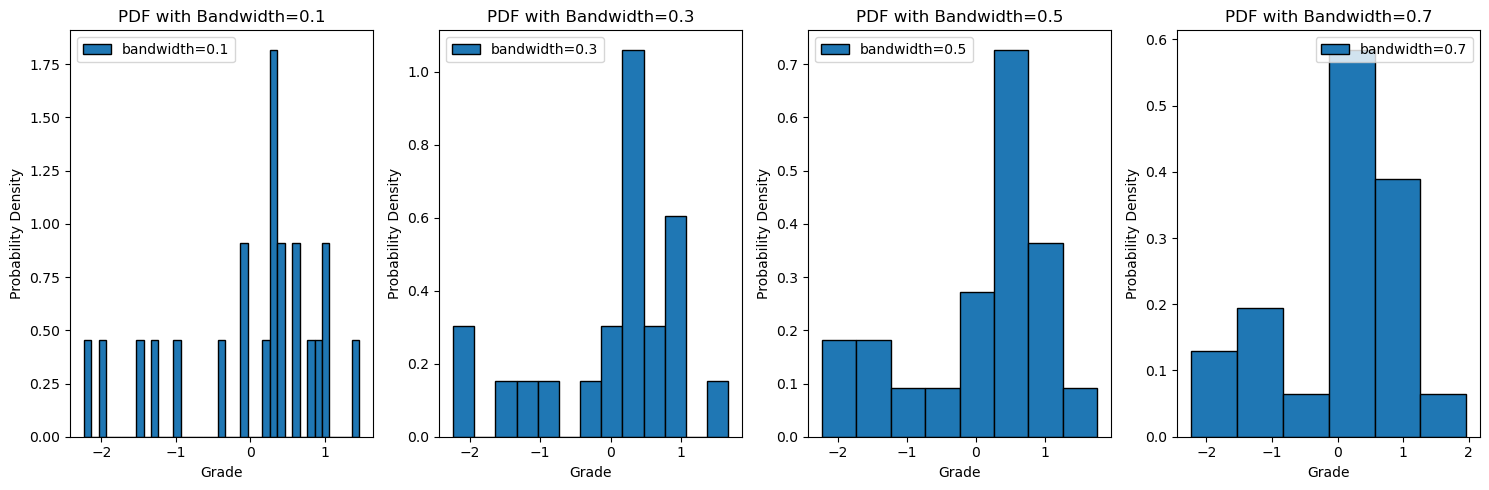

In [254]:
bandwidths = [0.1, 0.3, 0.5, 0.7]
plot_histogram(dataset1['Grade'], bandwidths, pdf=True)

In [289]:
def histogram2d_density_estimation(data1, data2, bandwidth=0.1):
    x_edges = np.arange(data1.min(), data1.max() + bandwidth, bandwidth)
    y_edges = np.arange(data2.min(), data2.max() + bandwidth, bandwidth)
    
    counts = np.zeros((len(x_edges) - 1, len(y_edges) - 1), dtype=int)
    
    for x, y in zip(data1, data2):
        x_bin_index = int((x - data1.min()) / bandwidth)
        y_bin_index = int((y - data2.min()) / bandwidth)
        
        counts[x_bin_index, y_bin_index] += 1
    
    normalized_counts = counts / np.sum(counts * bandwidth**2)
    return normalized_counts, x_edges, y_edges

In [290]:
def plot_2d_histogram(data1, data2, bandwidths, front=False):
    fig = plt.figure(figsize=(15, 5))

    for i, bandwidth in enumerate(bandwidths):
        counts, x_edges, y_edges = histogram2d_density_estimation(data1, data2, bandwidth=bandwidth)
        ylabel = 'Probability Density'
        
        ax = fig.add_subplot(1, len(bandwidths), i+1, projection='3d')
        xpos, ypos = np.meshgrid(x_edges[:-1] + bandwidth / 2, y_edges[:-1] + bandwidth / 2, indexing="ij")
        dx = dy = bandwidth
        dz = counts.ravel()
        ax.bar3d(xpos.ravel(), ypos.ravel(), np.zeros_like(dz), dx, dy, dz, shade=True)

        ax.set_title(f'2D Histogram with Bandwidth={bandwidth}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel(ylabel)
        if front:
            ax.view_init(elev=0, azim=50)
        else:
            ax.view_init(elev=25, azim=50)

    plt.tight_layout()
    plt.show()

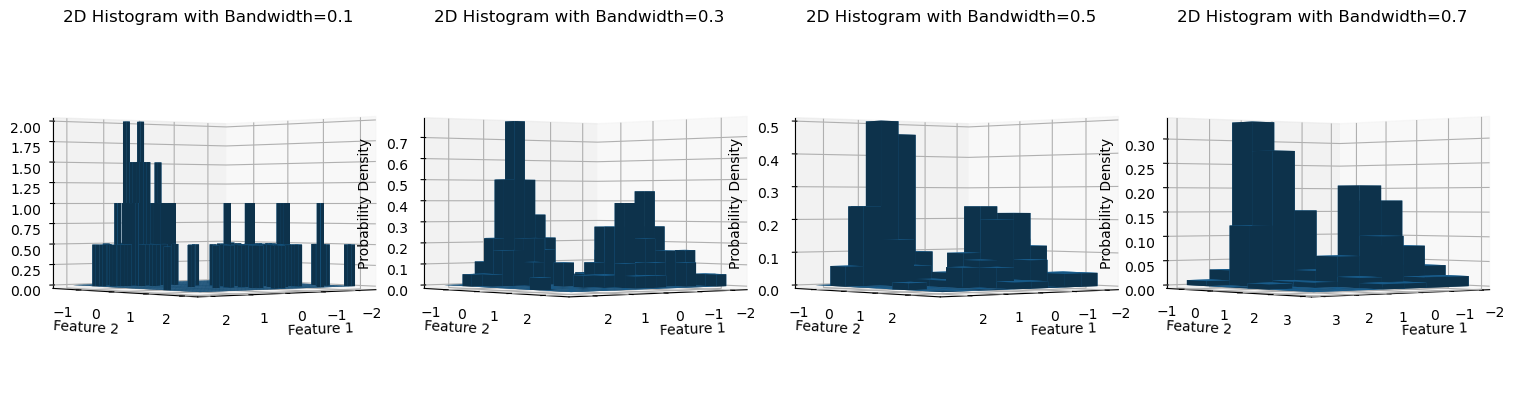

In [292]:
bandwidths = [0.1, 0.3, 0.5, 0.7]
plot_2d_histogram(dataset2['Feature2'], dataset2['Feature1'], bandwidths, front=True)


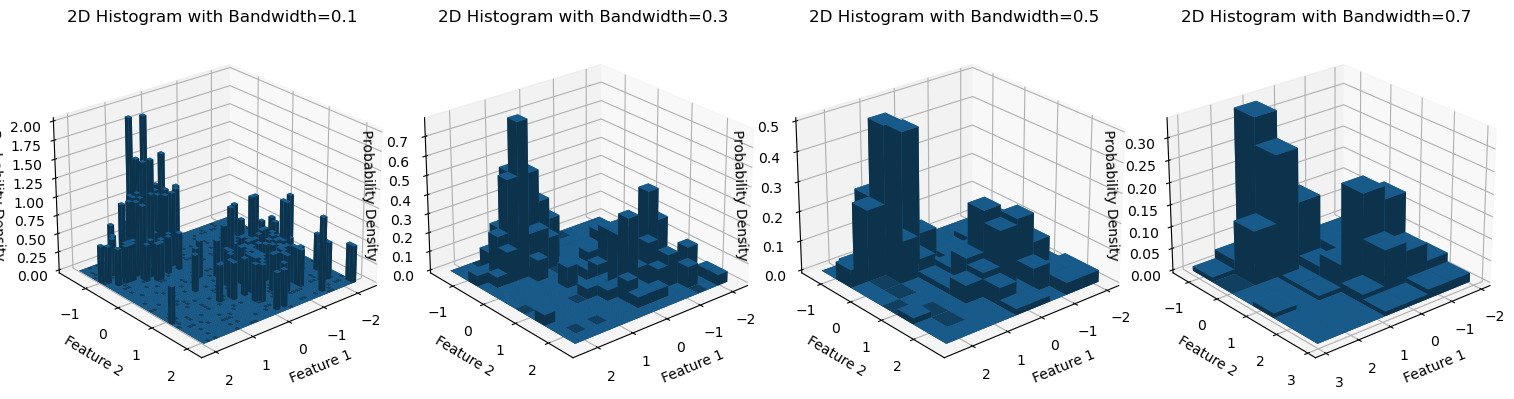

In [293]:
plot_2d_histogram(dataset2['Feature2'], dataset2['Feature1'], bandwidths, front=False)

if new data comes where should it go? :) p_hist function